In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file={
    "oi_a0_(4)": ["3gram_ordered_inbound_alpha0.0_1to5_mpht"],
    "oi_a0.01_(4)": ["3gram_ordered_inbound_alpha0.01_1to5_mpht"],
    "oi_a0.1_(4)": ["3gram_ordered_inbound_alpha0.1_1to5_mpht"],
    "oi_a0.25_(4)": ["3gram_ordered_inbound_alpha0.25_1to5_mpht"],
    "oi_a0.5_(4)": ["3gram_ordered_inbound_alpha0.5_1to5_mpht"],

    "oi_a0.1_(40)": ['3gram_ordered_inbound_alpha0.1_1to5_mega_text'],
    "oi_a0.1_(50)": ["3gram_ordered_inbound_alpha0.1_1to5_train(mega_text_50)_test(mega_text_50)"],
    
    
    "ri_a0_(4)": ["3gram_random_inbound_alpha0.0_1to5_mpht"],
    "ri_a0.01_(4)": ["3gram_random_inbound_alpha0.01_1to5_mpht"],
    "ri_a0.1_(4)": ["3gram_random_inbound_alpha0.1_1to5_mpht"],
    "ri_a0.25_(4)": ["3gram_random_inbound_alpha0.25_1to5_mpht"],
    "ri_a0.5_(4)": ["3gram_random_inbound_alpha0.5_1to5_mpht"],
    
    "ot_ow_i_a0.01_(4)": ["3gram_ordered_text_ordered_window_inbound_alpha0.01_1to5_mpht"],
    "ot_ow_i_a0.1_(4)": ["3gram_ordered_text_ordered_window_inbound_alpha0.1_1to5_mpht"],
    "ot_rw_i_a0.01_(4)": ["3gram_ordered_text_random_window_inbound_alpha0.01_1to5_mpht"],
    "ot_rw_i_a0.1_(4)": ["3gram_ordered_text_random_window_inbound_alpha0.1_1to5_mpht"],
    
    "ot_rw_i_a0.1_(40)": ['3gram_ordered_text_random_window_inbound_alpha0.1_1to5_mega_text_40'],
    
    "rt_ow_i_a0.01_(4)": ["3gram_random_text_ordered_window_inbound_alpha0.01_1to5_mpht"],
    "rt_ow_i_a0.1_(4)": ["3gram_random_text_ordered_window_inbound_alpha0.1_1to5_mpht"],
    "rt_rw_i_a0.01_(4)": ["3gram_random_text_random_window_inbound_alpha0.01_1to5_mpht"],
    "rt_rw_i_a0.1_(4)": ["3gram_random_text_random_window_inbound_alpha0.1_1to5_mpht"],
    
    "oi_a0.1_train(90)_test(10)": ['3gram_ordered_inbound_alpha0.1_1to5_train(mega_text_90)_test(mega_text_10)'],
    "ri_a0.1_train(90)_test(10)": ['3gram_random_inbound_alpha0.1_1to5_train(mega_text_90)__test(mega_text_10)']

    
}

df_all = pd.DataFrame(columns=['name','window_size', 'h_words', 'h_wordset', 'h_wordorder', 'entropy_rate', 'unordered_entropy_rate', 'entropy_rate_difference'])
c = 0
for k,v in file.items():
    df = pd.read_csv(file[k][0])
    df['window_size'] = [1,2,3,4,5]
    df['name'] = [k,k,k,k,k]
    df['h_wordorder'] = df['h_words'] - df['h_wordset']
    df['entropy_rate'] = df['h_words'] / df['window_size']
    df['unordered_entropy_rate'] = df['h_wordset'] / df['window_size']
    df['entropy_rate_difference'] = (df['h_words'] - df['h_wordset']) / df['window_size']
    del df['Unnamed: 0']
    for i in range(5):
        df_all.loc[5*c + i] = df.loc[i]
    c+=1

# df_all[df_all['name'] == ('oi_a0.1')]
df_all
# df_all['h_words'] - df_all['h_wordorder']


,name,window_size,h_words,h_wordset,h_wordorder,entropy_rate,unordered_entropy_rate,entropy_rate_difference
0,oi_a0_(4),1,9.781539,9.781539,0.000000,9.781539,9.781539,0.000000
1,oi_a0_(4),2,6.296139,5.678013,0.618127,3.148070,2.839006,0.309063
2,oi_a0_(4),3,2.550456,2.265267,0.285188,0.850152,0.755089,0.095063
3,oi_a0_(4),4,-1.179007,-1.438003,0.258997,-0.294752,-0.359501,0.064749
4,oi_a0_(4),5,-4.922380,-5.220598,0.298218,-0.984476,-1.044120,0.059644
...,...,...,...,...,...,...,...,...
110,ri_a0.1_train(90)_test(10),1,10.001012,10.001012,0.000000,10.001012,10.001012,0.000000
111,ri_a0.1_train(90)_test(10),2,13.744844,13.181608,0.563236,6.872422,6.590804,0.281618
112,ri_a0.1_train(90)_test(10),3,18.767574,18.251467,0.516107,6.255858,6.083822,0.172036
113,ri_a0.1_train(90)_test(10),4,23.793229,22.675691,1.117538,5.948307,5.668923,0.279384


In [3]:
# For a random training set, for each window size, 
# entropy in h_words will be greater than that found in the ordered training set

# This makes sense, because there is inherently more randomness in the random training set's ordering of tokens
# What does the difference between these h_words look like (ri - oi)?

# Predictability of the next word is what we are measuring. The strength of this will,
# in part, be determined by the ngram model we are using (2gram, 3gram, 4gram, etc.)

In [4]:
file={
    "oi_a0_(4)",    "ri_a0_(4)",
    "oi_a0.01_(4)", "ri_a0.01_(4)",  "ot_ow_i_a0.01_(4)",  "ot_rw_i_a0.01_(4)",  "rt_ow_i_a0.01_(4)",   "rt_rw_i_a0.01_(4)",
    "oi_a0.1_(4)",  "ri_a0.1_(4)",   "ot_ow_i_a0.1_(4)",   "ot_rw_i_a0.1_(4)",   "rt_ow_i_a0.1_(4)",    "rt_rw_i_a0.1_(4)",
    "oi_a0.1_(40)",
    "oi_a0.25_(4)", "ri_a0.25_(4)",
    "oi_a0.5_(4)",  "ri_a0.5_(4)",
    
    "oi_a0.1_train(90)_test(10)",
    "ri_a0.1_train(90)_test(10)",
    
    "oi_a0.1_(40)", 
    "oi_a0.1_(50)",
    "ot_rw_i_a0.1_(40)"

}

[]

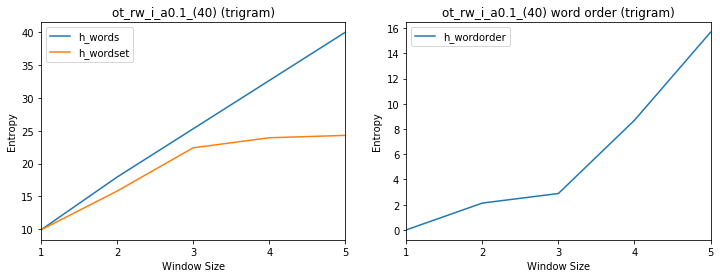

In [6]:
# Compare h_words/h_wordset and word order

name = 'ot_rw_i_a0.1_(40)'
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title=name+" word order (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

[]

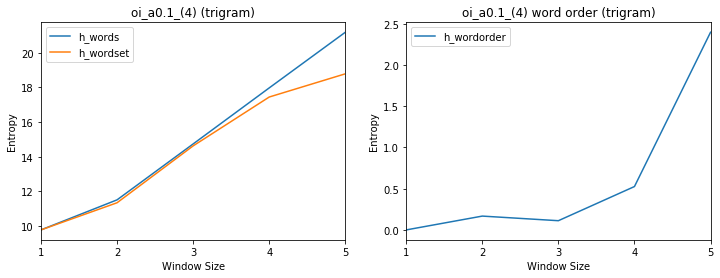

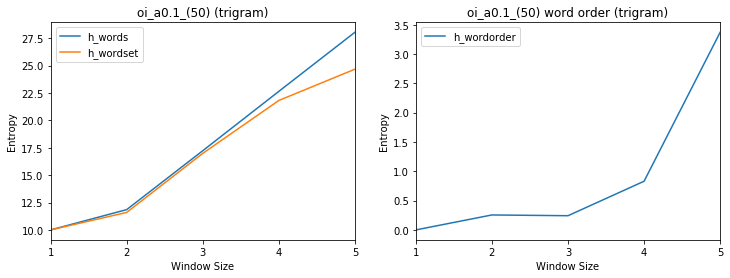

In [7]:
# Compare h_words/h_wordset and word order

name = 'oi_a0.1_(4)'
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title=name+" word order (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

name = 'oi_a0.1_(50)'
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title=name+" word order (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()


[]

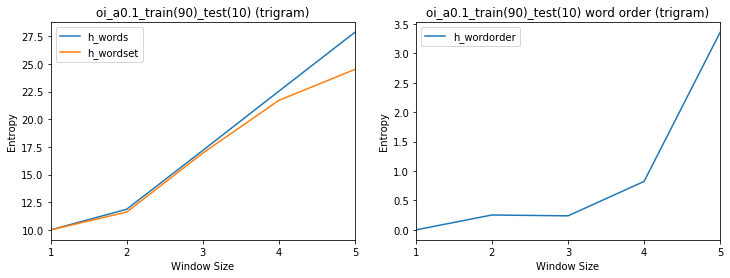

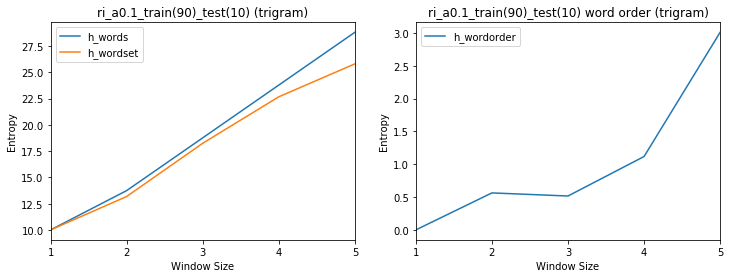

In [8]:
# Compare ordered and random h_words/h_wordset and wordorder

base = 'i_a0.1_train(90)_test(10)'

name = 'o'+base
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title=name+" word order (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

name = 'r'+base
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title=name+" word order (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

[]

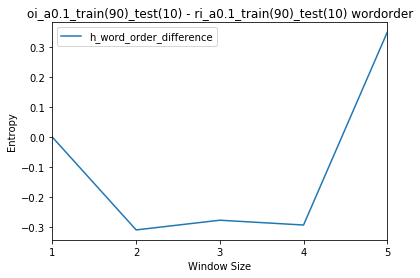

In [19]:
# Compare ordered and random wordorder difference

base = 'i_a0.1_train(90)_test(10)'
df = pd.DataFrame()
df['window_size'] = [1,2,3,4,5]
name1 = 'o'+base
df1 = df_all[df_all['name'] == name1].copy().reset_index(drop=True)

name2 = 'r'+base
df2 = df_all[df_all['name'] == name2].copy().reset_index(drop=True)

# df['h_word_order_difference'] = df2['h_wordorder'] - df1['h_wordorder']
df['h_word_order_difference'] = df1['h_wordorder'] - df2['h_wordorder']

# axis = df.plot(x="window_size", y=['h_word_order_difference'], title=name2 + " - " + name1 +" wordorder")
axis = df.plot(x="window_size", y=['h_word_order_difference'], title=name1 + " - " + name2 +" wordorder")
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

[]

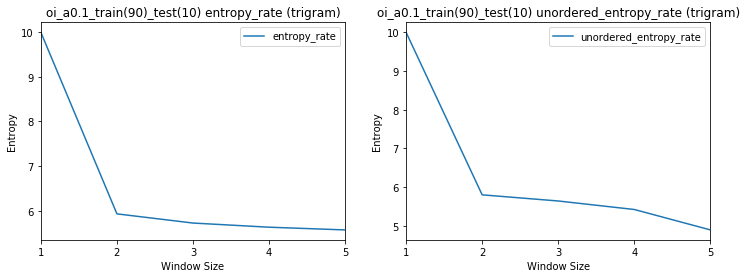

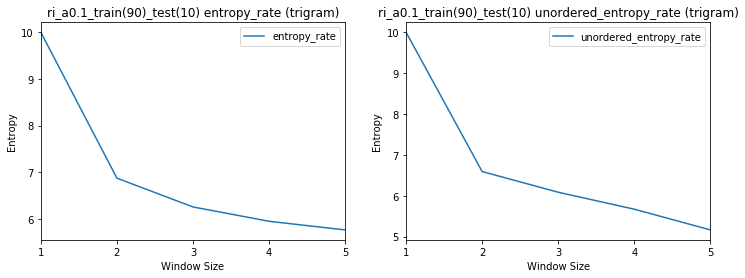

In [191]:
# Compare ordered and unordered entropy rates for random and ordered LM

base = 'i_a0.1_train(90)_test(10)'

name = 'o'+base
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["entropy_rate"], title=name+" entropy_rate (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['unordered_entropy_rate'], title=name+" unordered_entropy_rate (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

name = 'r'+base
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["entropy_rate"], title=name+" entropy_rate (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['unordered_entropy_rate'], title=name+" unordered_entropy_rate (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

[]

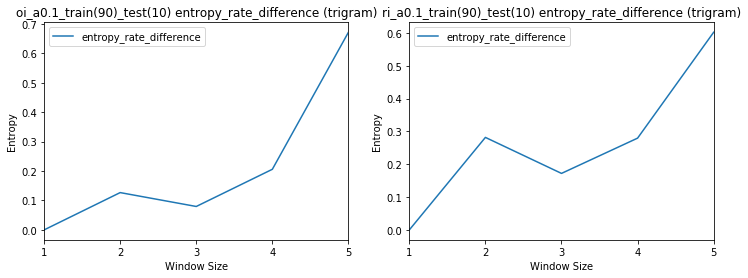

In [192]:
# Compare ordered and unordered entropy rates for random and ordered LM

base = 'i_a0.1_train(90)_test(10)'

name = 'o'+base
df = df_all[df_all['name'] == name].copy()

name2 = 'r'+base
df2 = df_all[df_all['name'] == name2].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["entropy_rate_difference"], title=name+" entropy_rate_difference (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df2.plot(x="window_size", y=['entropy_rate_difference'], title=name2+" entropy_rate_difference (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()


[]

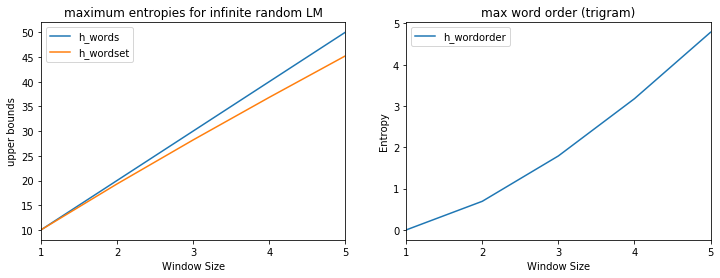

In [17]:
# Get entropy upper bounds given an infinite random LM

import scipy.special

df = pd.DataFrame()
df['window_size'] = [1,2,3,4,5]
df['upper_bounds'] = [0, 1, 2.584962500721156, 4.584962500721156,  6.906890595608519]
# df['h_words'] = 9.781669 * df['window_size'] 
df['h_words'] = 10.001012 * df['window_size'] 
df['h_wordset'] = df['h_words'] - np.log(scipy.special.factorial(df['window_size']))
df['exponential'] = [1,2,6,24,120]
df['h_wordorder'] = df["h_words"] - df['h_wordset']

fig, ax = plt.subplots(ncols=2,figsize=(12,4))

a = df.plot(x="window_size", y=['h_words', 'h_wordset'], title="maximum entropies for infinite random LM", ax=ax[0])
a.set(xlabel="Window Size", ylabel="upper bounds")
a.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title="max word order (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()

[]

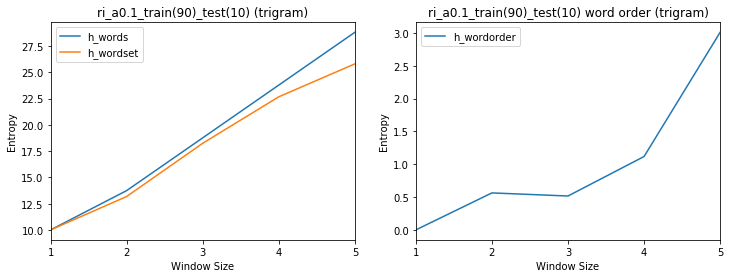

In [10]:
base = 'i_a0.1_train(90)_test(10)'

name = 'r'+base
df = df_all[df_all['name'] == name].copy()

fig, ax = plt.subplots(ncols=2,figsize=(12,4))
axis = df.plot(x="window_size", y=["h_words", "h_wordset"], title=name+" (trigram)", ax=ax[0])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

axis = df.plot(x="window_size", y=['h_wordorder'], title=name+" word order (trigram)", ax=ax[1])
axis.set(xlabel="Window Size", ylabel="Entropy")
axis.set_xticks(range(1,6,1))

plt.plot()